# Setup

In [1]:
!pip install --no-cache-dir -r requirements.txt


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles
from sklearn.metrics import accuracy_score

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# 1. Creation d'un premier neurone

## 1.1 Implementation de la classe neurone 

[![](https://mermaid.ink/img/pako:eNqFU01r4zAQ_StCJ7soh17NXpYuhWW3ubTQQByMYinpUFkyo3GLafPfd_zRjUzTXYEtMe_NzBtp5k3WwVhZyNrpGH-APqJuSi94_bwZTHAAi-Lb-2ol7l-as-kLzq_1-r-cte0w-H-Ca0uvAZ8_cwpBqMFnG9Wr2DqgqrVYW0-5eAlgLjm0aA3UlG1y4Y1G1P32Wl3tLlHRtgEpg-bYanoSkRD8MRcXZdhIWS5-Q6Tt-Lt1QdNuDjveZurxNtmHtWHvDyFXyu_OSL9ArmfklIacrieJthLOavSss0JNliOApxT2FdComO0iBfafuY-JAP9XwLCmvNkil5pC52cWeCDQDqImYHZSaS7EQ9c6u03Dq8N4Z4mqqmq4HR0_76Pa52LExQJ34chfjNl31c-EFOb2NcDtwPBmICySqnnfpR5da7iWzLwqsx-yqkWN-deyz69TeqlkY7HRYHiUxtcpJT3Zxpay4CM7P5ey9Cfm6Y7Cfe9rWRB2Vskp_zx5sjhoF9nKLUsB7-bZHLbTH096LLQ?type=png)](https://mermaid.live/edit#pako:eNqFU01r4zAQ_StCJ7soh17NXpYuhWW3ubTQQByMYinpUFkyo3GLafPfd_zRjUzTXYEtMe_NzBtp5k3WwVhZyNrpGH-APqJuSi94_bwZTHAAi-Lb-2ol7l-as-kLzq_1-r-cte0w-H-Ca0uvAZ8_cwpBqMFnG9Wr2DqgqrVYW0-5eAlgLjm0aA3UlG1y4Y1G1P32Wl3tLlHRtgEpg-bYanoSkRD8MRcXZdhIWS5-Q6Tt-Lt1QdNuDjveZurxNtmHtWHvDyFXyu_OSL9ArmfklIacrieJthLOavSss0JNliOApxT2FdComO0iBfafuY-JAP9XwLCmvNkil5pC52cWeCDQDqImYHZSaS7EQ9c6u03Dq8N4Z4mqqmq4HR0_76Pa52LExQJ34chfjNl31c-EFOb2NcDtwPBmICySqnnfpR5da7iWzLwqsx-yqkWN-deyz69TeqlkY7HRYHiUxtcpJT3Zxpay4CM7P5ey9Cfm6Y7Cfe9rWRB2Vskp_zx5sjhoF9nKLUsB7-bZHLbTH096LLQ)

L'objectif de ce diagramme est de faire la conception SOLID de classifieur se basant sur différent algorithme de machine learning. Lors de précédent projet l'interface Iclassifier et les classifieur SVM et KNN ici on reprend cette strucure afin d'y ajouter un neurone et plus tard un réseau de neurone. Ainsi tout les classifieurs auront le même fonctionnement 

Lors de l'ajout du Neurone dans ce diagramme, il ne faut pas changer l'existant pour s'adapter au Neurone créant ainsi des mauvaises 

## 1.2 Création du jeu de donnée 

Afin de pouvoir étudier notre Neurone, qui est capable de faire de la classification linéaire, il nous faut donc un jeu de donnée que le neurone puisse l'entrainer donc il nous faut un jeu qui convient. 

Pour cela ScikitLearn propose une fonction qui crée un dataset de blob qui est linéairement séparable puis dans un second nous passerons sur un dataset non linéaire afin de comparer comment se comporte notre neurone 

dimensions de X: (1000, 2)
dimensions de y: (1000,)


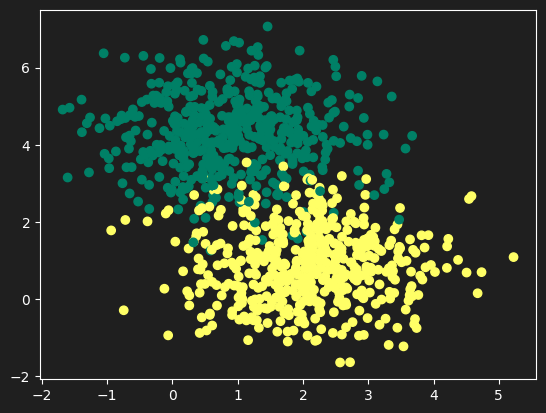

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=0)

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

## 1.3 Création et entrainement du neurone 

100%|██████████| 100/100 [00:00<00:00, 4359.48it/s]

Confusion matrix: 
[[96  6]
 [12 86]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       102
           1       0.93      0.88      0.91        98

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



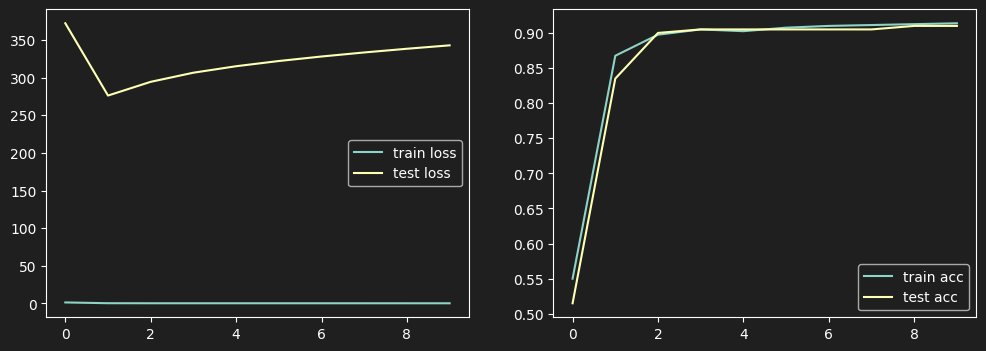

In [4]:
from neuron import Neurone

neurone = Neurone(100,0.1,X.shape[1])

neurone.train(X,y,0.2)
neurone.test()
neurone.report()

### Analyse des résultats 

Une fois notre neurone entrainé et tester sur un dataset linéairement séparable et un test sur 20% des données on obtient une précision de 95%. 
Bien que pour un premier test les resultats peuvent être améliorer de plusieurs manières, on peut augmenter le jeu donnée mais cette approche à une limite qu'il faudrait estimé savoir jusqu'à qu'elle quantité de donnée le Neurone vas s'amélioré. 
L'autre méthode serait de changer les hyper-paramètres learning rate et le nombre d'itération, changer ces paramètres peuvent avoir différent impact sur le modèle sans changer la quantité de donnée. 
Cette dernière méthode à pour désavantage de pouvoir aussi rendre notre modèle moins performant s'il mal ajuster.  

dimensions de X: (1000, 2)
dimensions de y: (1000,)


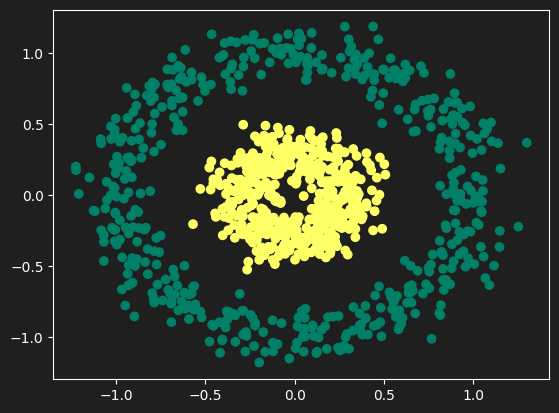

In [5]:
X, y = make_circles(n_samples=1000,noise= 0.1 ,factor= 0.3, random_state=0)

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

100%|██████████| 100/100 [00:00<00:00, 10026.30it/s]

Confusion matrix: 
[[65 47]
 [51 37]]
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       112
           1       0.44      0.42      0.43        88

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.51      0.51       200



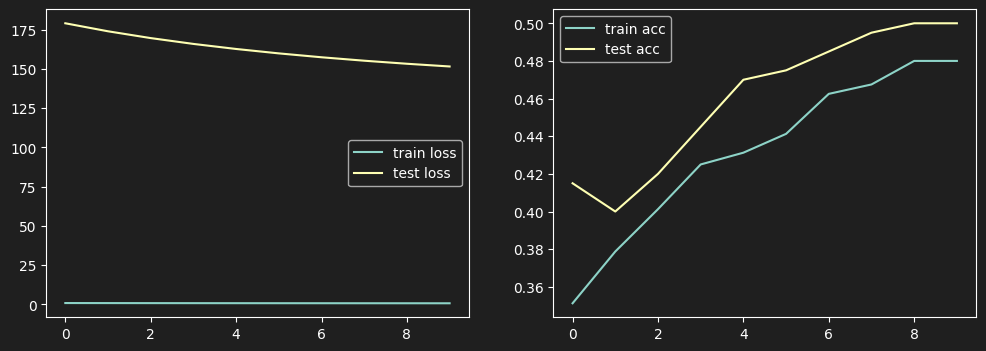

In [6]:
neurone_circle = Neurone(n_iter= 100,learning_rate= 0.1,n_features= X.shape[1])

neurone_circle.train(X,y,0.2)
neurone_circle.test()
neurone_circle.report()

Dans le cas d'un jeu de donnée non linéairement séparable le neurone ne pourra pas aller au dessus de 50% de précision, un Neurone n'est donc pas adapté à ce cas. La solution peut-être de augmenter le nombre de neurone. Il nous faut donc revoir notre modèle pour résoudre ce cas. 

# 2. Construction d'un réseau de neurone

Le principale incovénient d'un neurone est sa limite au modèle linéaire, pour palier à ce problème deux solution sont possible. On peut faire du feature engienering c'est à dire de la création de caractéristique afin d'obetenir des modèles polynomiales mais c'est un travail qui demande de l'expertise et du temps. L'autre est d'ajouter d'autre neurone à notre modèle afin ainsi de constituer un réseau de neurone.

![Schéma_réseau](schema_reseau.PNG)

Le schéma ci-dessus représente un réseau de neurone à une couche avec 2 entré et 1 sortie. Afin de faire fonctionner ce réseau nous allons devoir factoriser l'ensemble des équations de chaque neurone pour obtenir des matrices qui permettrons de généraliser l'implémentation du réseau sans avoir à revoir sa structure si on veut ajouter des couches. 

![Calcule Activation](couche_2.png)

Donc pour la formule de l'activation, nous allons considéré W comme l'emsemble des poids des entrant de chaque neurone de la couche soit dans l'exemple 2 entrant X 3 neurone soit 6 valueur, b représente l'ensemble des biais de chaque neurone, A l'ensemble des données entrante de la couche précédante en considérant aussi les entrés comme des couches. Ce qui nous donne Z l'esemble des équations d'activation de notre couche de neurone.  

![Forward Propagation](forward.png)

Pour la formule de l'aggrégation, nous allons réalisé le même procéder et considérer A comme l'ensemble des aggrégations avec Z l'ensemble des activation ce qui donne les formules ci-dessus pour la forward propagation. 

100%|██████████| 2000/2000 [00:03<00:00, 521.63it/s]


Confusion matrix: 
[[ 88   3]
 [  9 100]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        91
           1       0.97      0.92      0.94       109

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



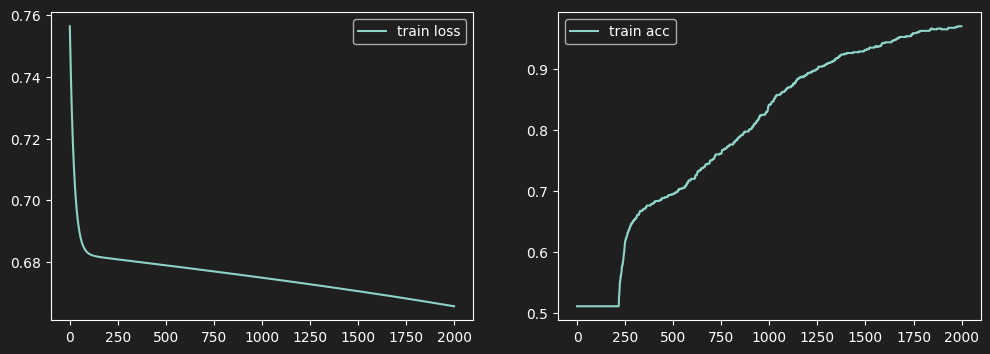

In [8]:
from neuron import NeuralNetwork
neural_network_circle = NeuralNetwork(n_iter= 2000,learning_rate= 0.01, dimensions= [X.shape[1],16,16,16,1])

neural_network_circle.train(X,y,split_percent= 0.2)
neural_network_circle.test()
neural_network_circle.report()

Une fois notre réseau entrainé sur notre de jeu de données de cercles, on peut voir que le réseau arrive à un résultat de 94% de réussite, ce résultat pouvant être améliore en optimisant les Hyper-paramètres comme le nombre d'itération ou encore le taux d'apprentissage. Il serrait possible aussi d'augmenter le nombre de neurone dans chaque couche et le nombre de couche.

On pourrait ainsi obtenir de meilleurs résultat ça ce genre d'optimisation peut prendre du temps et des resources de calcule en fonction de la taille du réseau. 